# PA005: High Value Customer Identification ( Insiders )

## 0.0 Planejamento da Solução( IOT )

### Input - Entrada

1. Problema de Negócio
- Selecionar os clientes mais valiosos para integrar um programa de Fidelização. 

2. Conjunto de Dados
- Vendas de um e-commerce online, durante o período de um ano. 

### Outpout - Saída

1. indicação das pessoas que farão parte do programa de Insiders 
- Lista: client_id|is_insider|
    
            10323 | yes/1
            32413 | no/1
            
2. Relatório com as respostas das perguntas de negócio.

- Quem são as pessoas elegíveis para participar do programa de
Insiders ?
- Quantos clientes farão parte do grupo?
- Quais as principais características desses clientes ?
- Qual a porcentagem de contribuição do faturamento, vinda do
Insiders ?
- Qual a expectativa de faturamento desse grupo para os próximos
meses ?
- Quais as condições para uma pessoa ser elegível ao Insiders ?
- Quais as condições para uma pessoa ser removida do Insiders ?
- Qual a garantia que o programa Insiders é melhor que o restante da
base ?
- Quais ações o time de marketing pode realizar para aumentar o
faturamento?

### Tasks - Tarefas

1. Quem são as pessoas elegíveis para participar do programa de
Insiders ?
    - O que é ser elegível ?  O que são clientes de maior "valor"
    - Faturamento: 
        - Alto Ticket médio.
        - Alto LTV(receita média por cliente durante o relacionamento com a empresa.)
        - Baixa Recência(tempo desde a ultima compra)
        - Alto bascket size( Tamanho da sexta de compra)
        - Baixa probabilidade de churn(Cliente para de comprar).
        
        
    - Custo:
        - Baixa Taxa de devolução. 
               
        
    - Experiência de Compra:
        - Média alta das avaliação.         
        

2. Quantos clientes farão parte do grupo?
    - Número total de clientes.
    - % do grupo Insiders
    
3. Quais as principais características desses clientes ?
    - Escrever características do cliente:
        - Idade
        - Localização. 

    - Escrever características do consumo.
        - Atributos da clusterização. 
        
4. Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
         - Faturamento total do ano.
         - Faturamento do grupo de Insiders
         
5. Qual a expectativa de faturamento desse grupo para os próximos meses ?
        - LTV do grupo Insiders
        - Análise de cohort()

6. Quais as condições para uma pessoa ser elegível ao Insiders ?
        - Definir a periodicidade( 1 mês, 3 mêses )
        - A pessoa precisa ser similar ou parecido com uma pessoa grupo. 
               
7. Quais as condições para uma pessoa ser removida do Insiders ?
        - Definir a periodicidade( 1 mês, 3 mêses )
        - A pessoa precisa ser desimilar ou não-parecido com uma pessoa grupo. 
        
8. Qual a garantia que o programa Insiders é melhor que o restante da base ?
    - Teste A/B
    - Teste A/B Baysiano
    - Teste de hipótese

9. Quais ações o time de marketing pode realizar para aumentar o faturamento?
    - Desconto
    - Preferencia de compra
    - Frente 
    - Visita a empresa

# 0.0 Imports

## 0.1. Libries

In [49]:
import pandas  as pd
import numpy   as np
import seaborn as sns

from matplotlib          import pyplot  as plt
from sklearn             import cluster as c
from sklearn.cluster     import KMeans
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')


## 0.2. Helper Function

## 0.3. Load Dataset

In [2]:
#Load data
df_raw = pd.read_csv('data/Ecommerce.csv', sep=',', encoding = "ISO-8859-1")

#Drop extra column
df_raw = df_raw.drop( columns = ['Unnamed: 8'], axis = 1 )

In [3]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


# 1.0. Descrição dos Dados

In [4]:
df1 = df_raw.copy()

## 1.1 Rename Columuns

In [5]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
cols_new= ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'customer_id', 'country']
df1.columns = cols_new
df1.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')

## 1.2. Data Dimensions

In [7]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of cols: {}'.format( df1.shape[1] ) )

Number of Rows: 541909
Number of cols: 8


## 1.3. Data Types

In [8]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 1.4. Check NA

In [9]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.5 Replace NA

In [10]:
df1 = df1.dropna( subset = ['description', 'customer_id'])
print( 'Foram removidos: {:.2f}% dos dados'.format( 1- (df1.shape[0]/df_raw.shape[0])))

Foram removidos: 0.25% dos dados


In [11]:
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## 1.6 Change Types

In [12]:
#invoice date
df1['invoice_date'] = pd.to_datetime( df1['invoice_date'], format = '%d-%b-%y')

#customer id
df1['customer_id'] = df1['customer_id'].astype( int )
df1.head(1)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom


In [13]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

## 1.7. Desctiptive Statistical

# 2.0. Feature Engeneering

In [14]:
df2 = df1.copy()

## 2.1. Feature Creation

In [15]:
df2.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


In [16]:
#data reference
df_ref = df2.drop(['invoice_no', 'stock_code', 'description','quantity','unit_price','invoice_date','country'], axis = 1).drop_duplicates(ignore_index = True )


In [17]:
# Gross Revenue ( Faturamento ) quanty + price 
df2['gross_revenue'] = df2[ 'quantity' ] * df2[ 'unit_price' ]

# Monetary
df_monetary = df2[['customer_id', 'gross_revenue']].groupby( 'customer_id').sum().reset_index()
df_ref = pd.merge( df_ref, df_monetary, on = 'customer_id', how= 'left')
                  
# Recency - Last day purchase
df_recency = df2[['customer_id', 'invoice_date']].groupby( 'customer_id').max().reset_index()
df_recency['recency_days'] = (df2['invoice_date'].max() - df_recency['invoice_date'] ).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge(df_ref, df_recency, on = 'customer_id', how = 'left' )

#Frequency
df_freq = df2[['customer_id', 'invoice_no']].drop_duplicates().groupby( 'customer_id').count().reset_index()
df_ref = pd.merge(df_ref, df_freq, on = 'customer_id', how = 'left' )

In [18]:
df_ref.head()

,customer_id,gross_revenue,recency_days,invoice_no
0,17850,5288.63,302,35
1,13047,3079.10,31,18
2,12583,7187.34,2,18
3,13748,948.25,95,5
4,15100,635.10,330,6


# 3.0. Data Filtering

In [24]:
df3 = df_ref.copy()

# 4.0. EDA(Exploratory Data Analysis)

In [25]:
df4 = df3.copy()

# 5.0. Data Preparation

In [26]:
df5 = df4.copy()

# 6.0. Feature Selection

In [27]:
df6 = df5.copy()

# 7.0. Hyperparameter Fine-Tunning

In [29]:
x = df6.drop( columns = ['customer_id'])

In [31]:
clusters = [2, 3, 4, 5, 6 ]

## 7.1 Within-Cluster Sum of Square( WSS )

Text(0.5, 1.0, 'WSS vc K')

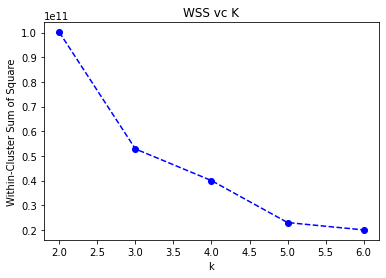

In [46]:
wss = []
for k in clusters:
    #model definition
    kmeans = c.KMeans( init = 'random', n_clusters = k, n_init = 10, max_iter = 300, random_state = 42 )
    
    #model training
    kmeans.fit( x )
    
    #validation
    wss.append( kmeans.inertia_)

#plot wss - elbow methods
plt.plot( clusters, wss, linestyle = '--', marker = 'o', color = 'b')
plt.xlabel( 'k' )
plt.ylabel( 'Within-Cluster Sum of Square' );
plt.title( 'WSS vc K')


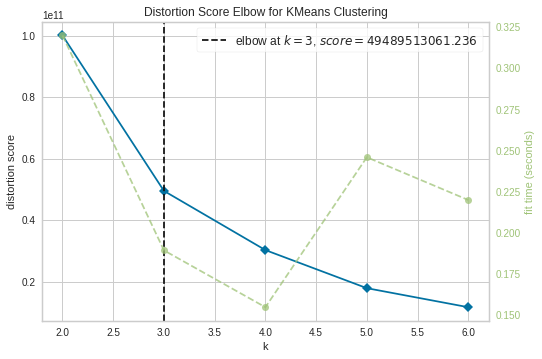

In [53]:
kmeans = KElbowVisualizer( c.KMeans(), k = clusters, timining = False )
kmeans.fit( x )
kmeans.show();

## 7.2 Within-Cluster Sum of Square( WSS )

# 8.0. Machine Learning

# 9.0. Cluster Analysis

# 10.0. Deploy To Production